In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('train_ML_IOT.csv')

In [4]:
data.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [5]:
data.tail(10)

,DateTime,Junction,Vehicles,ID
48110,2017-06-30 14:00:00,4,10,20170630144
48111,2017-06-30 15:00:00,4,14,20170630154
48112,2017-06-30 16:00:00,4,16,20170630164
48113,2017-06-30 17:00:00,4,16,20170630174
48114,2017-06-30 18:00:00,4,17,20170630184
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [6]:
len(data)

48120

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data = data[data['Junction'] == 1]
data = data['Vehicles']
data

0         15
1         13
2         10
3          7
4          9
        ... 
14587    105
14588     96
14589     90
14590     84
14591     78
Name: Vehicles, Length: 14592, dtype: int64

In [9]:
data = np.array(data).reshape(-1,1) # I convert it because I will use MinMaxScaler. It takes 2D array.
type(data)

numpy.ndarray

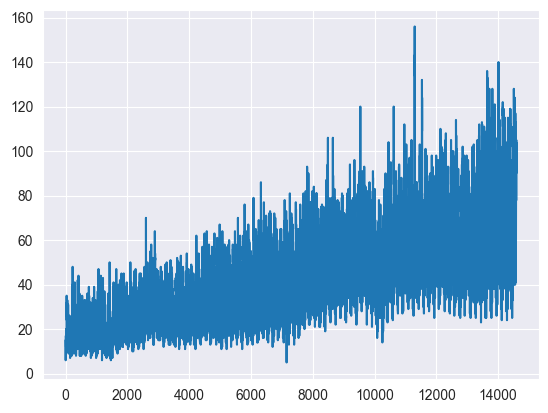

In [10]:
plt.plot(data)
plt.show()

In [11]:
sc = MinMaxScaler()
data = sc.fit_transform(data)

In [12]:
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]

In [13]:
def data_with_time_steps(data, time_steps):  # I create data with time steps. I will use it for LSTM. Why time steps? Because I want to predict the next value with the previous values.
    dataX = []
    datay = []
    for i in range(len(data)-time_steps):
        dataX.append(data[i:i+time_steps, 0])
        datay.append(data[i+time_steps, 0])
    return np.array(dataX), np.array(datay) # I convert them to numpy array because I will use LSTM.    

In [14]:
time_steps = 30
X_train, y_train = data_with_time_steps(train, time_steps)
X_test, y_test = data_with_time_steps(test, time_steps)

In [15]:
X_train.shape

(11643, 30)

In [16]:
X_test.shape

(2889, 30)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])) # I convert it because I will use LSTM. It takes 3D array.
X_test = np.reshape(X_test, (X_test.shape[0], 1,  X_test.shape[1])) # Why did I use 1 in y axes? Because I have only 1 feature.

In [18]:
model = Sequential()
model.add(LSTM(units = 128, input_shape = (1, time_steps)))
model.add(Dense(units = 64))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               81408     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 89729 (350.50 KB)
Trainable params: 89729 (350.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs = 23, batch_size = 1)

Epoch 1/23
11643/11643 [==============================] - 23s 2ms/step - loss: 0.0015
Epoch 2/23
11643/11643 [==============================] - 17s 1ms/step - loss: 0.0011
Epoch 3/23
11643/11643 [==============================] - 15s 1ms/step - loss: 9.7913e-04
Epoch 4/23
11643/11643 [==============================] - 15s 1ms/step - loss: 9.2521e-04
Epoch 5/23
11643/11643 [==============================] - 14s 1ms/step - loss: 9.0830e-04
Epoch 6/23
11643/11643 [==============================] - 15s 1ms/step - loss: 8.8106e-04
Epoch 7/23
11643/11643 [==============================] - 15s 1ms/step - loss: 8.6407e-04
Epoch 8/23
11643/11643 [==============================] - 14s 1ms/step - loss: 8.5492e-04
Epoch 9/23
11643/11643 [==============================] - 14s 1ms/step - loss: 8.4764e-04
Epoch 10/23
11643/11643 [==============================] - 15s 1ms/step - loss: 8.2625e-04
Epoch 11/23
11643/11643 [==============================] - 16s 1ms/step - loss: 8.3527e-04
Epoch 12/23
1164

In [21]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = sc.inverse_transform(y_test)

91/91 [==============================] - 0s 1ms/step


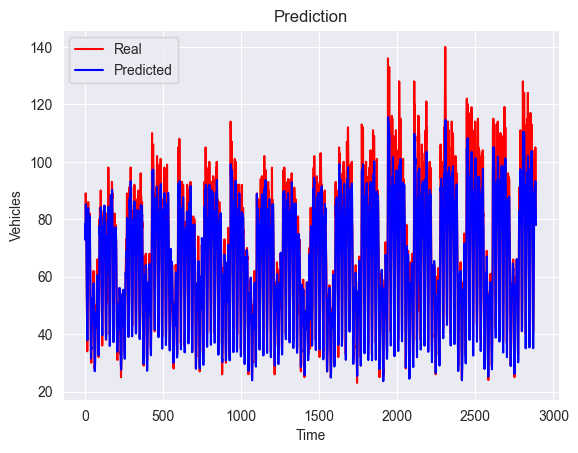

In [22]:
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()